In [2]:
# creating plots to depict potential variables for index scale
from herbie import Herbie, FastHerbie
import pandas as pd, numpy as np
import xarray as xr
import dask
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap


In [3]:
ogds = xr.open_dataset('meteo473gfs9272024.nc')


In [8]:
# pulling all of our selected variables out of our downloaded model run, different methods depending on the variable type and what we are trying to do with it
# conversions for some of the variables are also included here for easy use down below

# (Ellie)
ds = ogds.sel(longitude = slice(-97, -70), latitude = slice(35, 26))
lat = ds.latitude.values
lon = ds.longitude.values
vo = ds['vo'].values
gh = ds['gh'].sel(isobaricInhPa = 500).values
t = ds['t'].sel(isobaricInhPa = 1000).values
tF = ((t-273) * (9/5)) + 32
tp = ds['tp'].values
sp = ds['sp'].values
uNew = ds['u'].sel(isobaricInhPa = 1000).values
vNew = ds['v'].sel(isobaricInhPa = 1000).values


<built-in method max of numpy.ndarray object at 0x7fd1ea761e30>


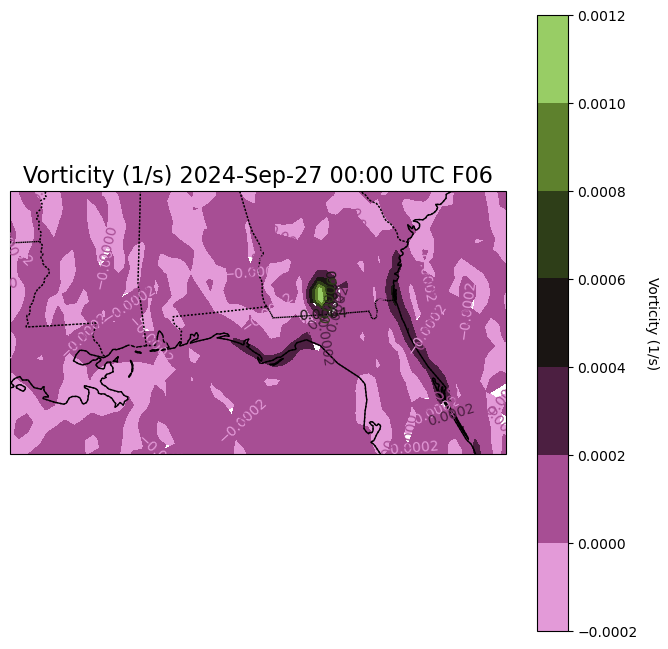

In [5]:
#(Ellie)
dataproj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-92,-79,33,28], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

cs = ax.contourf(lon, lat, vo[0,:,:], cmap = 'vanimo', transform=dataproj)
plt.clabel(cs)

cbar = plt.colorbar(cs, ax=ax, orientation='vertical')
cbar.set_label('Vorticity (1/s)', rotation=270, labelpad=15)

ax.set_title('Vorticity (1/s) 2024-Sep-27 00:00 UTC F06', fontsize=16)

plt.show()


- (Landon)
- Vorticity and its rotation within the air can play a role in tropical storm intensification which can bring more flash flooding and other types of damage
- The units being in s^-1 highlight a spot right around the Florida/Georgia border
- -0.0002 from 0.0002 can be our first line of severity being a 1, then from 0.0002 to 0.0006 can be a severity of 2, 0.0006 to 0.0008 can be a severity of 3, 0.0008 to 0.0010 being a 4, and 0.0010 to 0.0012 being the max severity in this case being a five.
- This is key to our index in the end because vorticity normally goes along with movement of a tropical storm, as well as indication of stong counterclockwise movement.

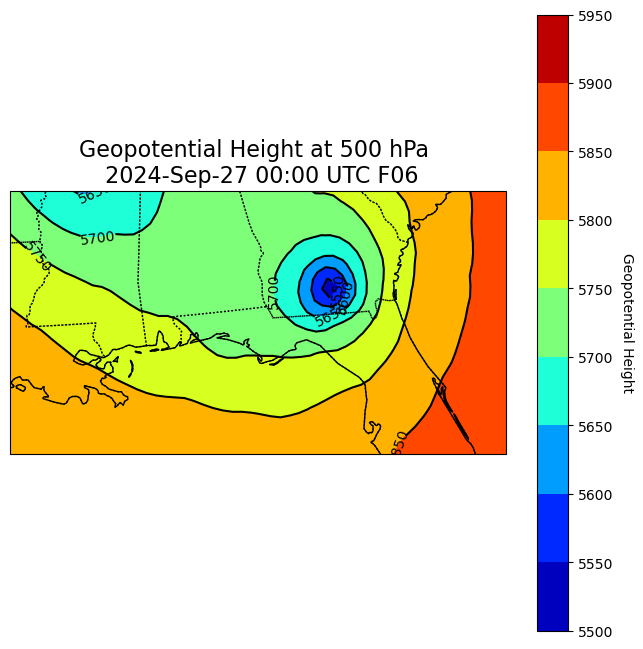

In [38]:
#(Ellie)
dataproj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-92,-79,33,28], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

c = ax.contour(lon,lat,gh[:,:], colors = 'k', transform = dataproj)
cs = ax.contourf(lon, lat, gh[:,:], cmap = 'jet', transform=dataproj)
plt.clabel(c)

cbar = plt.colorbar(cs, ax=ax, orientation='vertical')
cbar.set_label('Geopotential Height', rotation=270, labelpad=15, color = 'k')

ax.set_title('Geopotential Height at 500 hPa \n 2024-Sep-27 00:00 UTC F06', fontsize=16)

plt.show()

- (Landon)
- Geopotential height at 500 hPa and its interaction with the westerlies are often linked with heavier rainfall from cyclonic activity.
- Using a scale from 1 to 5 just like the previous graph would be most ideal.
- The warmer colors can be at a less of a severity although they may still be getting rainfall, they are not receiving it as heavily. For example, the red and orange can be under a severity of 1-2, yellow and green can be under a severity of 3, and the lighter blues can be a severity of 4 and then the lowest numbers around 5500 can be the highest severity.

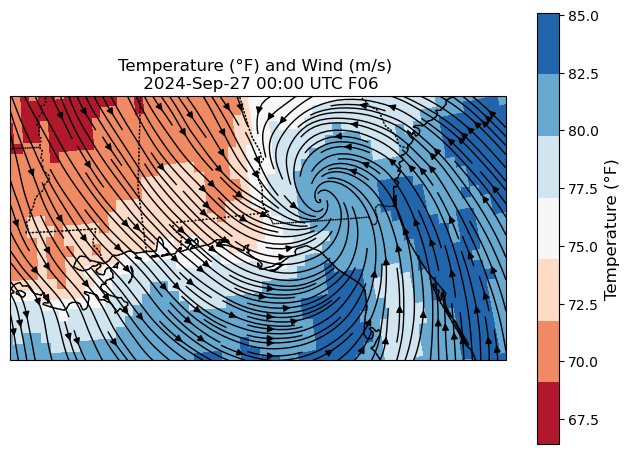

In [11]:
#(Ellie)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-92,-79,33,28], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# creation of new colormap (using RGB values from Color Brewer)
rdbu_rgb_255 = [
    (178,24,43),
(239,138,98),
(253,219,199),
(247,247,247),
(209,229,240),
(103,169,207),
(33,102,172)
]

# divide RGB values by 255 to allow plotting correctly
rdbu_rgb = [(r / 255, g / 255, b / 255) for r, g, b in rdbu_rgb_255]

# color map with adjusted RGB values for correct plotting
rdbu_cmap = ListedColormap(rdbu_rgb)

mesh = ax.pcolormesh(lon, lat, tF, cmap= rdbu_cmap, transform=ccrs.PlateCarree(), shading = 'auto')
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.7)

ax.streamplot(lon, lat, uNew, vNew, transform=ccrs.PlateCarree(), 
            color='black', linewidth=1, density=2)

             
ax.set_title('Temperature (°F) and Wind (m/s) \n 2024-Sep-27 00:00 UTC F06', fontsize=12)
cbar.set_label('Temperature (°F)', fontsize=12)


- (Landon)
- Temperature and wind is able to show us when and where it will weaken which can weaken our severity index. When tropical cyclones reach the surface and away from the warm moisure from the ocean they will deintensify very quickly. The winds are able to show us the rotation of the storm too if we change the forecast hours. Within the center and right side of the cycle can receive the highest severity, and anything towards the west and where the temperatures are way cooler can receive an index of 1 or the lowest in this case.

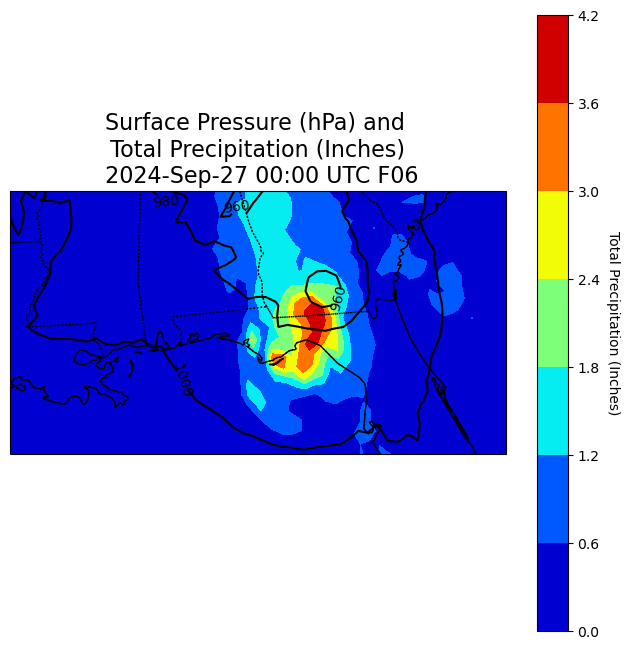

In [40]:
#(Ellie)
dataproj = ccrs.PlateCarree()

# The basemap creation
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-92,-79,33,28], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))


sp2 = sp/100 #conversion from Pa to hPa
tp2 = tp*39.37 # conversion meters to inches

c = ax.contour(lon,lat,sp2[:,:], colors = 'k', transform = dataproj)
cs = ax.contourf(lon, lat, tp2[:,:], cmap = 'jet', transform=dataproj)
plt.clabel(c)

cbar = plt.colorbar(cs, ax=ax, orientation='vertical')
cbar.set_label('Total Precipitation (Inches)', rotation=270, labelpad=15, color = 'k')

ax.set_title('Surface Pressure (hPa) and \n Total Precipitation (Inches) \n 2024-Sep-27 00:00 UTC F06', fontsize=16)

plt.show()

- (Landon)
- Surface presure and precipitation over the total forecast hour is also another important part into our severity index.
- The lowest surface pressure is able to point out where the center of the tropical storm is and where the bunch of precipitation is at. Once again, using the scale from 1 to 5 for severity we could analyze that anything below an inch over the 6 hour period can be a severity from 1 to 2,  1.2 inches to 2.0 can be a severity of 2, 2.0 inches to 3.0 can be a severity of 3, anything from 3.0 to 3.8 can be a severity of 4, and anything above can be the highest severity of 5.

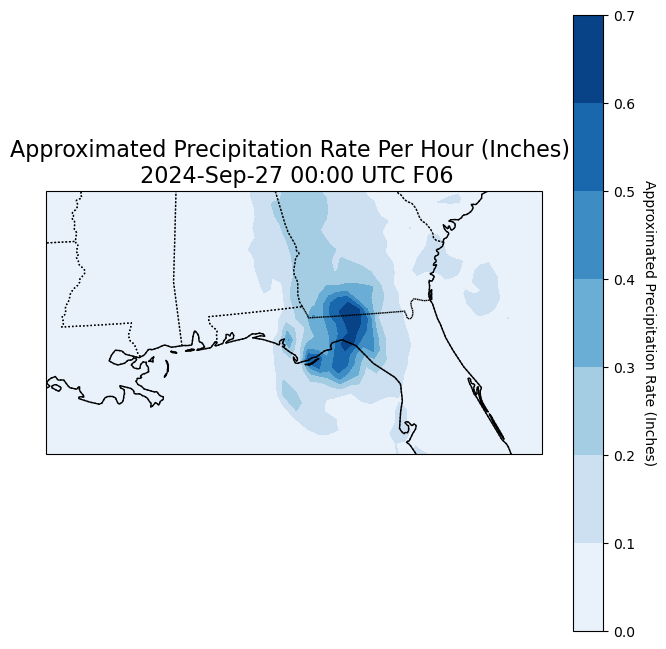

In [41]:
#(Ellie)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-92,-79,33,28], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'), linestyle=':')
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

approximatedprate = (tp*39.37)/6 # approximation via dividing the total precipitation by the number of hours between the initialization period and our forecast hour (6 hours)

cs = ax.contourf(lon, lat, approximatedprate[:,:], cmap = 'Blues', transform=dataproj)
plt.clabel(c)

cbar = plt.colorbar(cs, ax=ax, orientation='vertical')
cbar.set_label('Approximated Precipitation Rate (Inches)', rotation=270, labelpad=15, color = 'k')

ax.set_title('Approximated Precipitation Rate Per Hour (Inches) \n 2024-Sep-27 00:00 UTC F06' , fontsize=16)

plt.show()

- (Landon)
- Lastly, our derived parameter is accumulated precipitation by the hour which is a main issue when regarding to flash flooding. Anything below 0.2 inches can be the lowest severity and then anything from 0.7 inches and above for hourly precipitation nears the highest severity when considering rapid intensification with flash flooding. 

In [42]:
# 3d taking at one latitude and then changing longitude and height

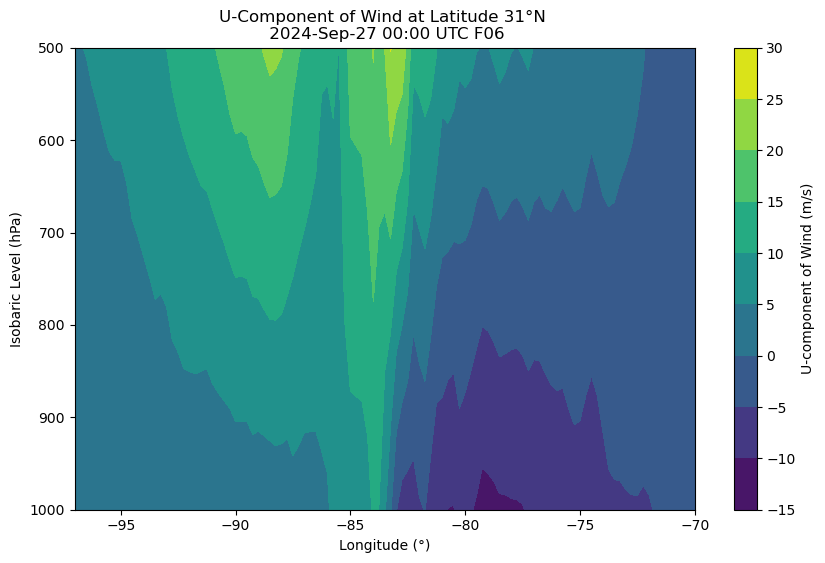

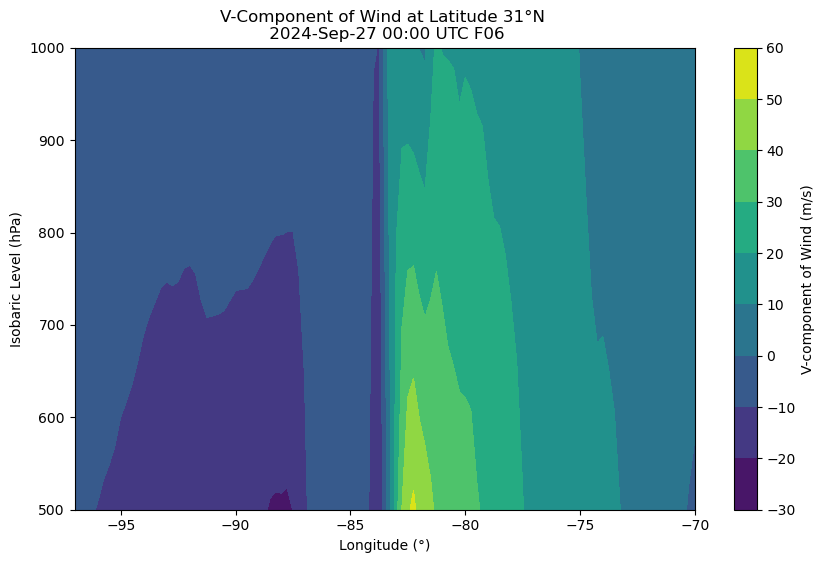

In [44]:
#(Ellie)
lat_index = np.where(ds['latitude'] == 31)[0][0] # approximating an index of latitude that goes through the middle of the storm (AI used to help find the index, and it means..)
# that it is pulling the first indices where the latitude equals to 31 and is then storing that value 

uNew2 = (ds['u']).values[:,lat_index,:] # getting the new u values with the constant latitude value

plt.figure(figsize=(10, 6))
ax = fig.add_subplot(211)
plt.contourf(ds['longitude'], ds['isobaricInhPa'], uNew2, cmap='viridis')
plt.colorbar(label='U-component of Wind (m/s)')
plt.xlabel('Longitude (°)')
plt.ylabel('Isobaric Level (hPa)')

plt.gca().invert_yaxis() # reversing the y-axis (isobaric decrease)
plt.title('U-Component of Wind at Latitude 31°N \n 2024-Sep-27 00:00 UTC F06')

ax = fig.add_subplot(212)

vNew2 = (ds['v']).values[:,lat_index,:] # getting the new v values with the constant latitude value

plt.figure(figsize=(10, 6))
plt.contourf(ds['longitude'], ds['isobaricInhPa'], vNew2, cmap='viridis')
plt.colorbar(label='V-component of Wind (m/s)')
plt.xlabel('Longitude (°)')
plt.ylabel('Isobaric Level (hPa)')


plt.title('V-Component of Wind at Latitude 31°N \n 2024-Sep-27 00:00 UTC F06')
plt.show()
